In [ ]:

!pip install matplotlib seaborn numpy pandas scikit-image
!sudo apt update && sudo apt install -y imagemagick



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.4/146.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 35.3 MB/s eta 0:00:00
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease


In [ ]:
from google.colab import files
uploaded = files.upload()


# **RQT Graphs**

Cartographer



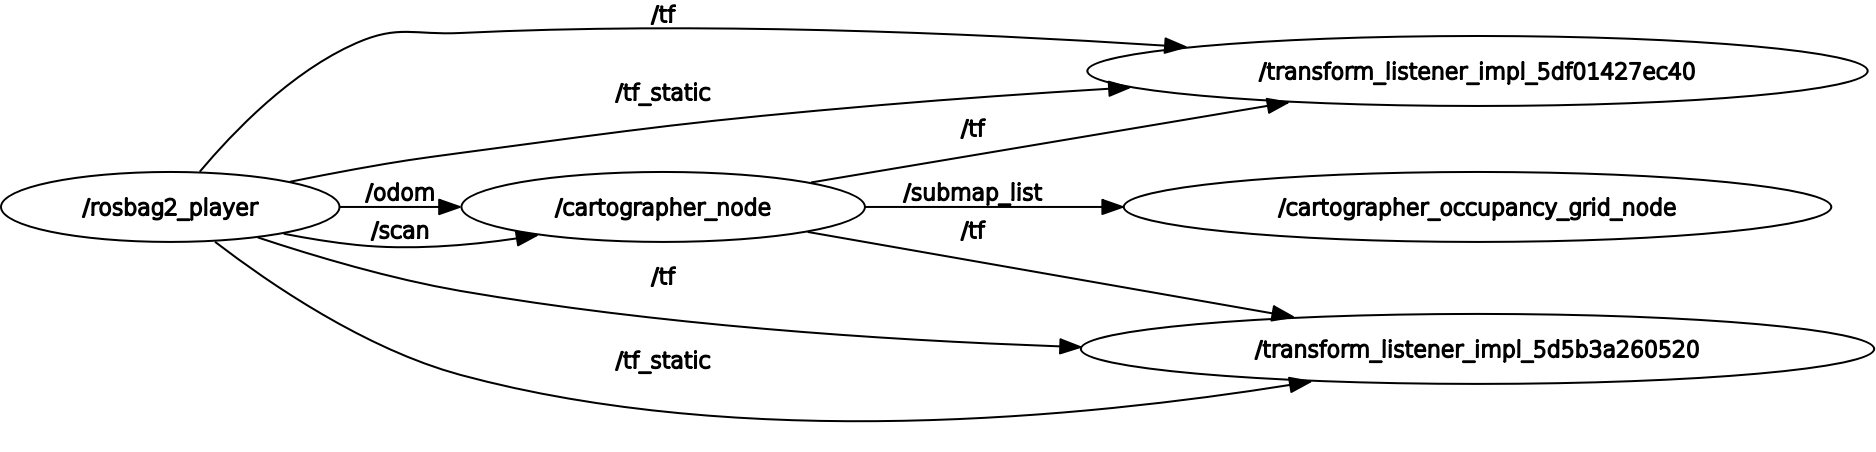


Slam Toolbox



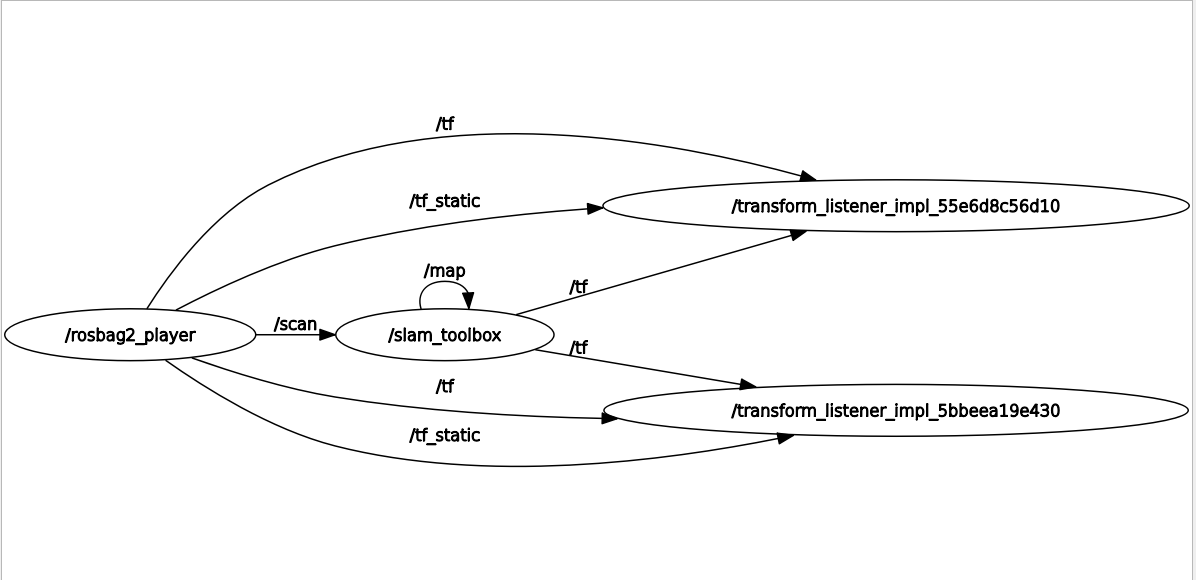


RTAB-Map



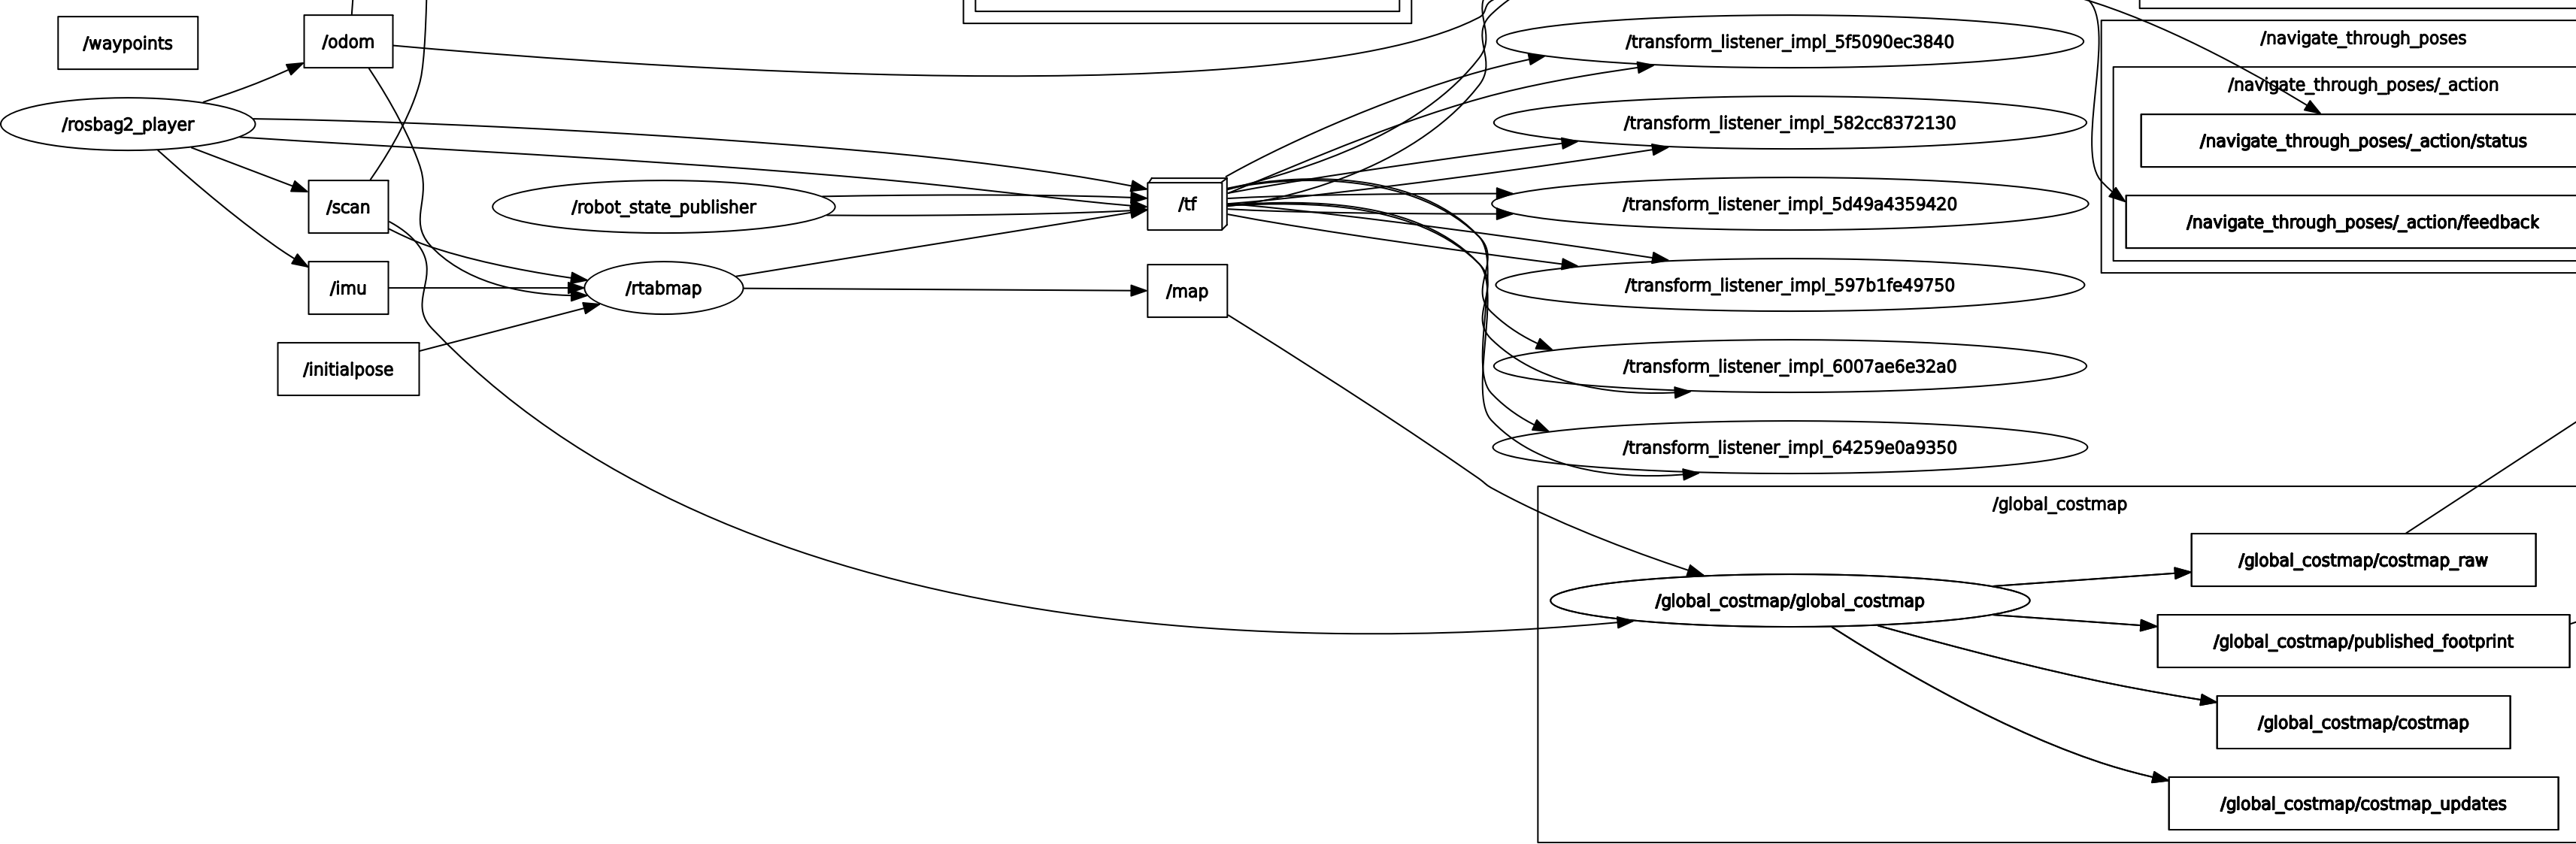

In [ ]:
from IPython.display import Image, display

print('Cartographer')
print('')
display(Image(filename='/content/cartoRQT_graph.png'))
print('')
print('Slam Toolbox')
print('')
display(Image(filename='/content/slamtoolboxRQT_graph.png'))
print('')
print('RTAB-Map')
print('')
display(Image(filename='/content/rtabmapRQT_graph.png'))

# **House**

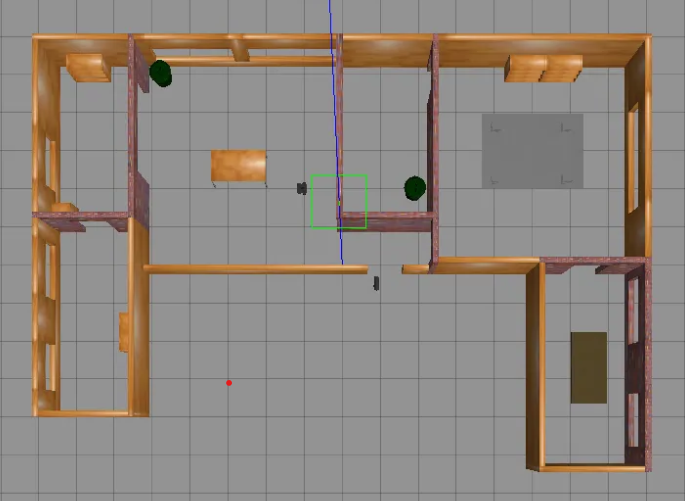

In [ ]:
from IPython.display import Image, display

print('')
display(Image(filename='/content/house.png'))

# **Maps (0.15m/s)**

Map 1 Image Path: /content/carto_map.pgm
Map 2 Image Path: /content/slamtool_map.pgm
Map 3 Image Path: /content/rtabmap_map.pgm


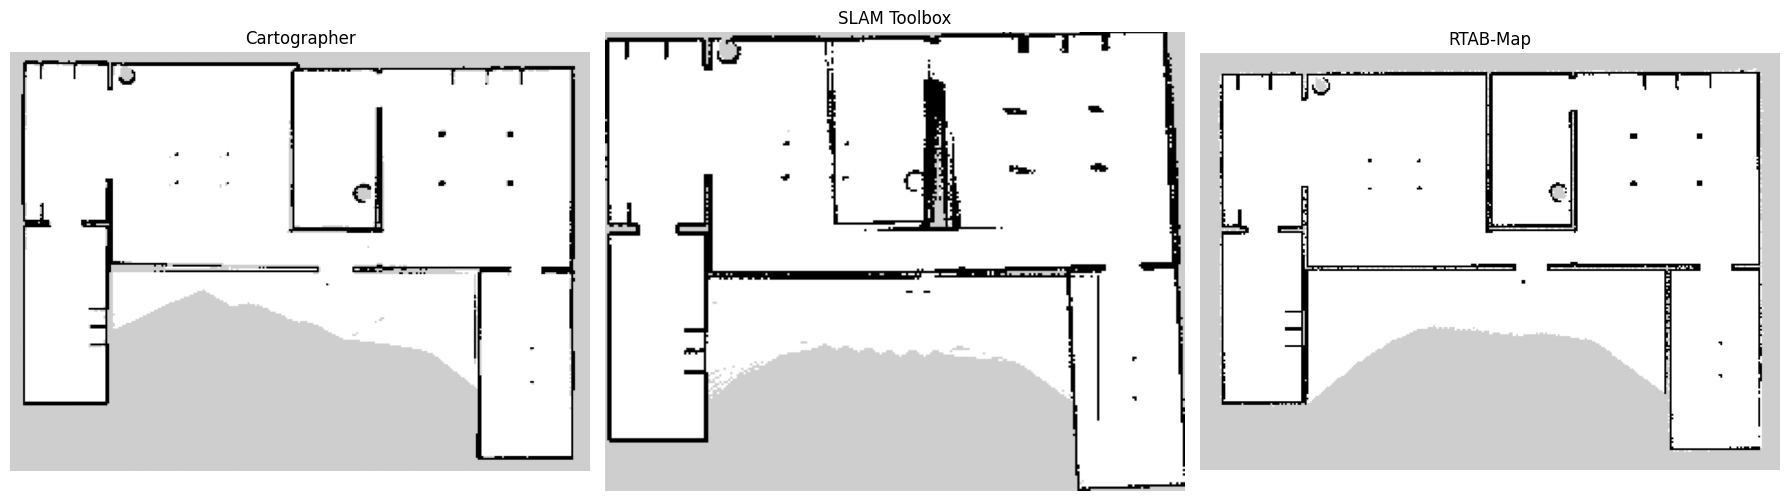

In [ ]:
import os
import yaml
import matplotlib.pyplot as plt
import imageio.v2 as imageio


def load_image_from_yaml(yaml_file_path):
    with open(yaml_file_path, 'r') as file:
        data = yaml.safe_load(file)
        image_filename = data.get('image')
        if image_filename:
            image_path = os.path.join(os.path.dirname(yaml_file_path), image_filename)
            return image_path
        else:
            raise ValueError(f"No image path found in {yaml_file_path}")

def display_all_maps(paths, titles):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for i, (path, title) in enumerate(zip(paths, titles)):
        img = imageio.imread(path)
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(title)
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

map1_yaml = '/content/carto_map.yaml'
map2_yaml = '/content/slamtool_map.yaml'
map3_yaml = '/content/rtabmap_map.yaml'


map1_image_path = load_image_from_yaml(map1_yaml)
map2_image_path = load_image_from_yaml(map2_yaml)
map3_image_path = load_image_from_yaml(map3_yaml)

print("Map 1 Image Path:", map1_image_path)
print("Map 2 Image Path:", map2_image_path)
print("Map 3 Image Path:", map3_image_path)

display_all_maps(
    [map1_image_path, map2_image_path, map3_image_path],
    ["Cartographer", "SLAM Toolbox", "RTAB-Map"]
)


# **SSIM, IoU and Heat Map (0.15m/s)**


-------------------------------------COMPARING: Cartographer vs SLAM Toolbox-------------------------------------------
Cartographer:
  Original size: 310x224 pixels
  Resolution: 0.050 m/pixel

SLAM Toolbox:
  Original size: 264x209 pixels
  Resolution: 0.050 m/pixel



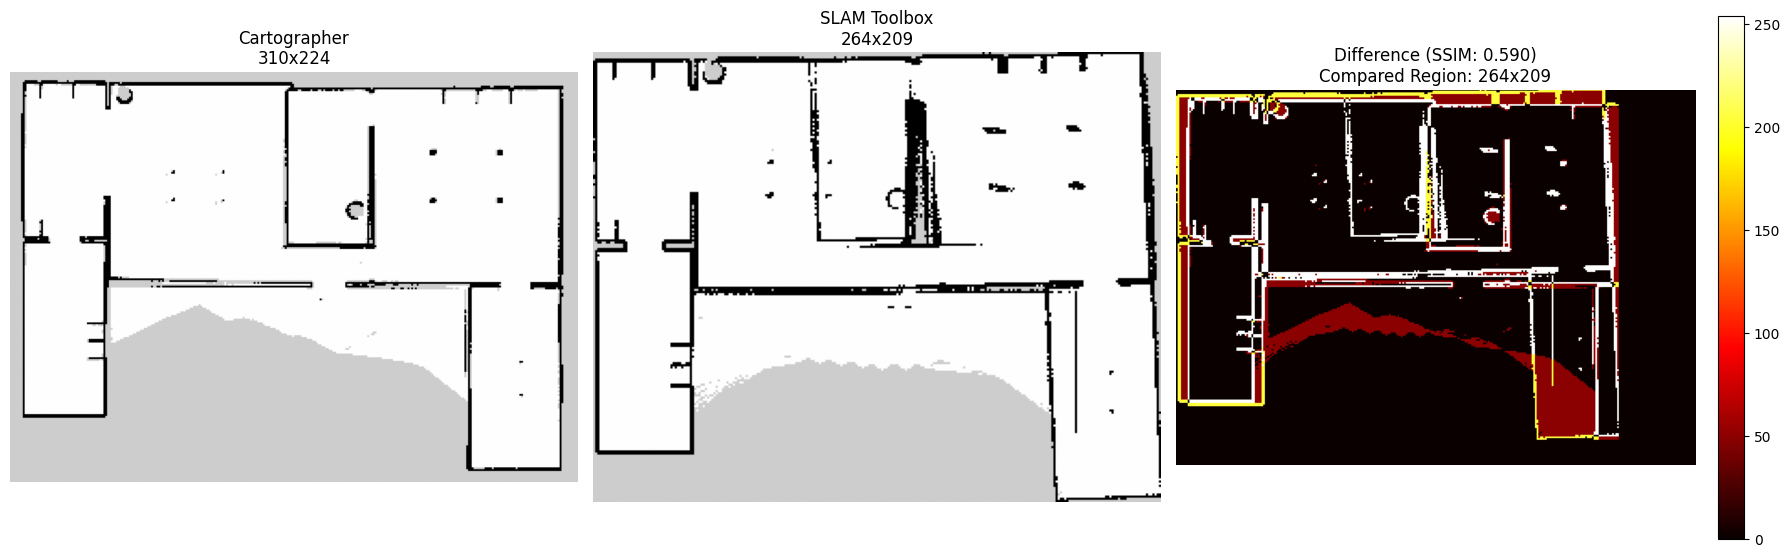

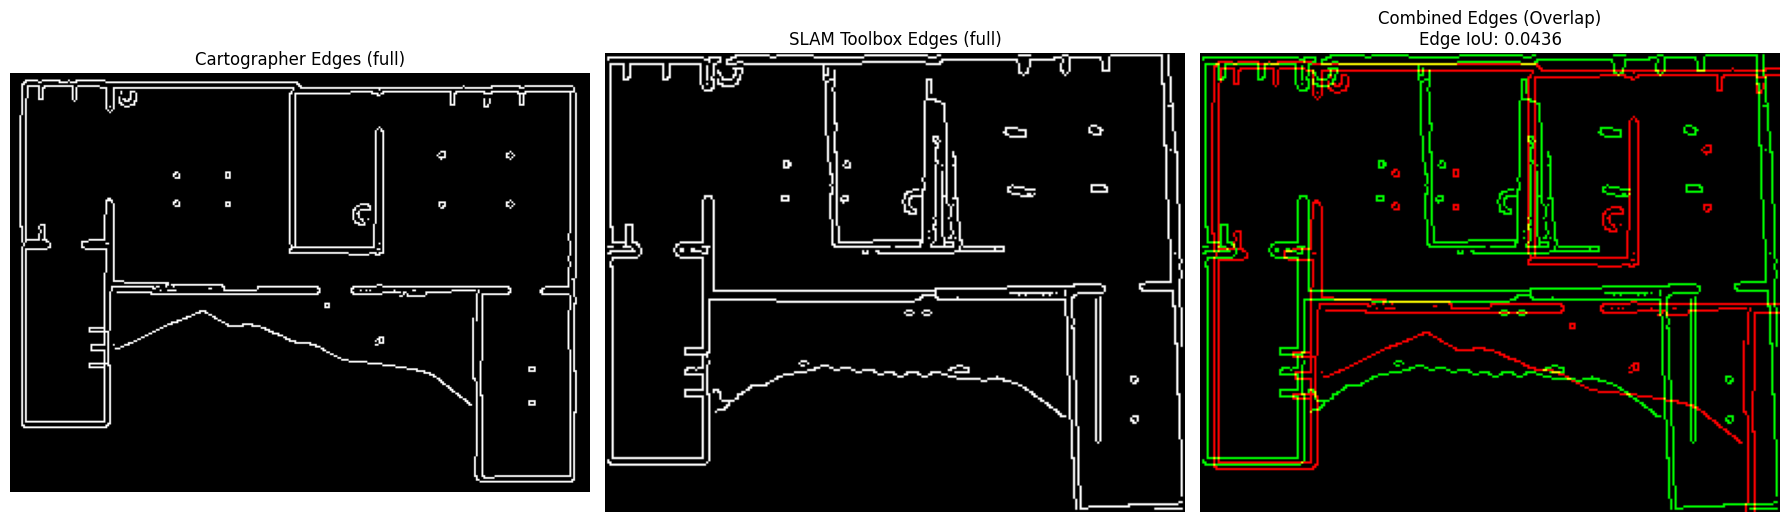


COMPARISON RESULTS:
SSIM (on overlapping region of size 264x209): 0.5901
Edge IoU (on overlapping region of size 264x209): 0.0436



-------------------------------------COMPARING: Cartographer vs RTAB-Map-------------------------------------------
Cartographer:
  Original size: 310x224 pixels
  Resolution: 0.050 m/pixel

RTAB-Map:
  Original size: 321x231 pixels
  Resolution: 0.050 m/pixel



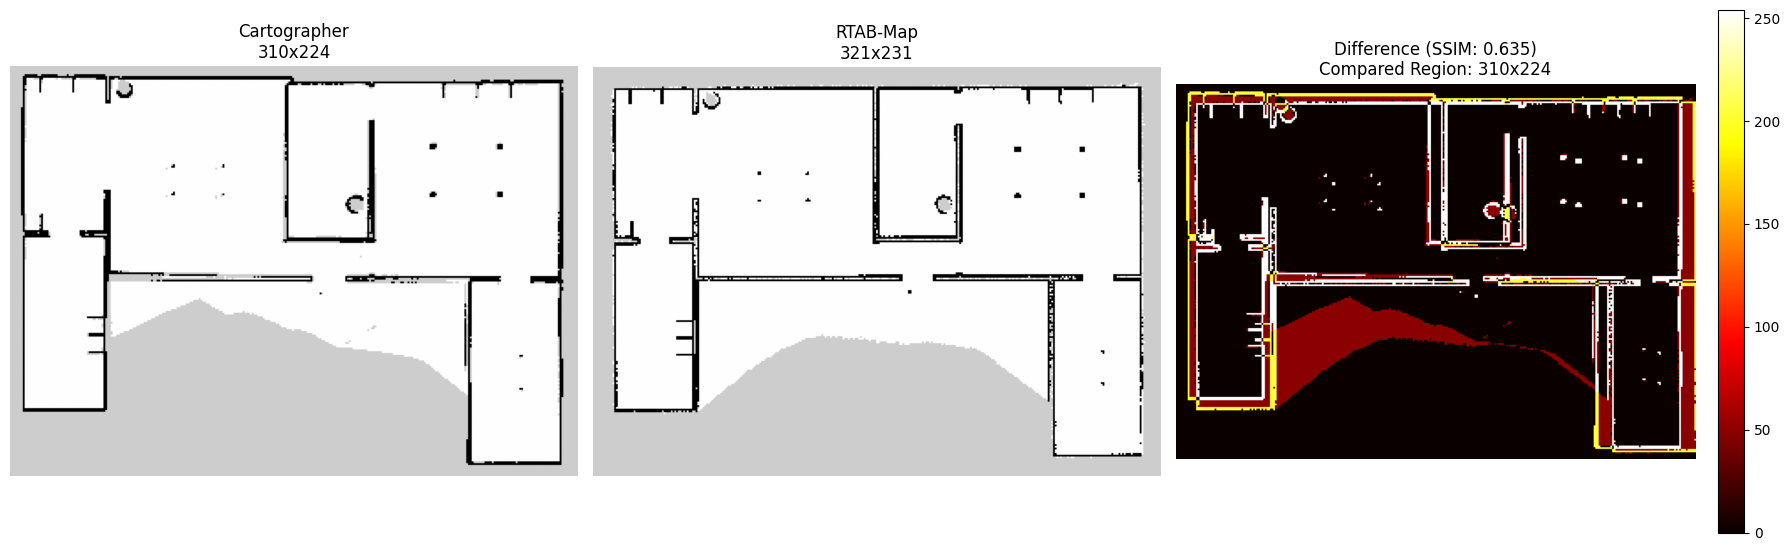

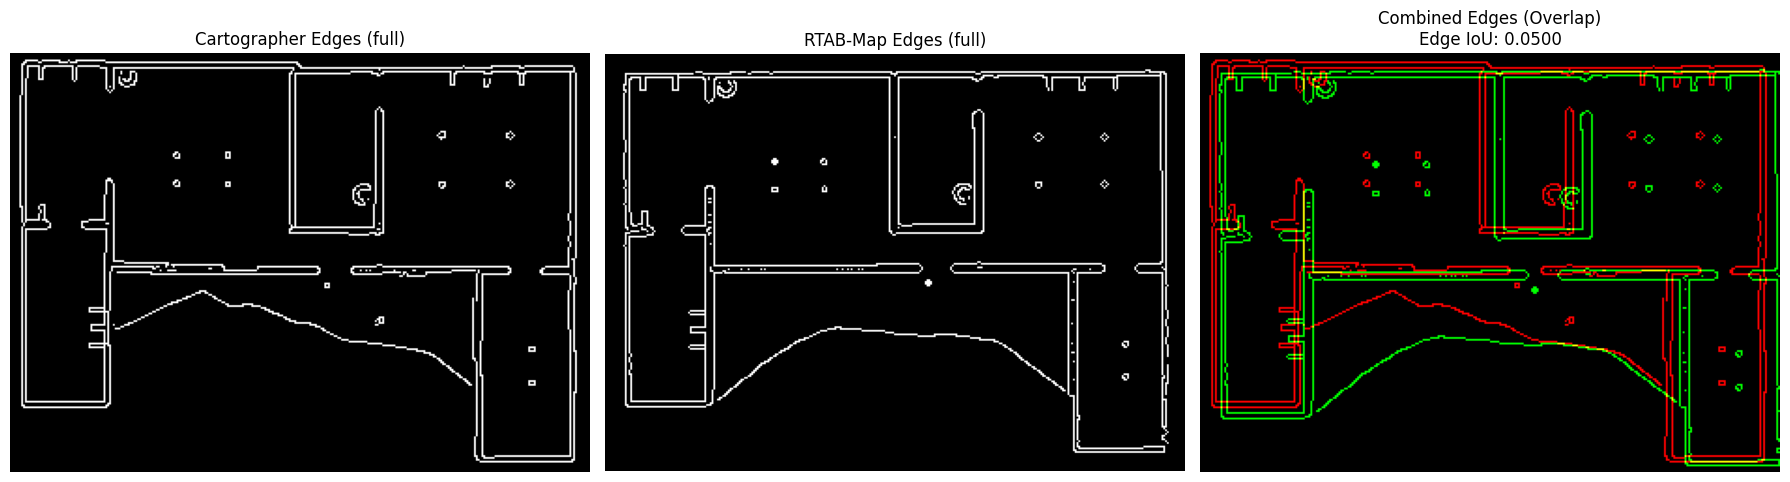


COMPARISON RESULTS:
SSIM (on overlapping region of size 310x224): 0.6352
Edge IoU (on overlapping region of size 310x224): 0.0500



-------------------------------------COMPARING: SLAM Toolbox vs RTAB-Map-------------------------------------------
SLAM Toolbox:
  Original size: 264x209 pixels
  Resolution: 0.050 m/pixel

RTAB-Map:
  Original size: 321x231 pixels
  Resolution: 0.050 m/pixel



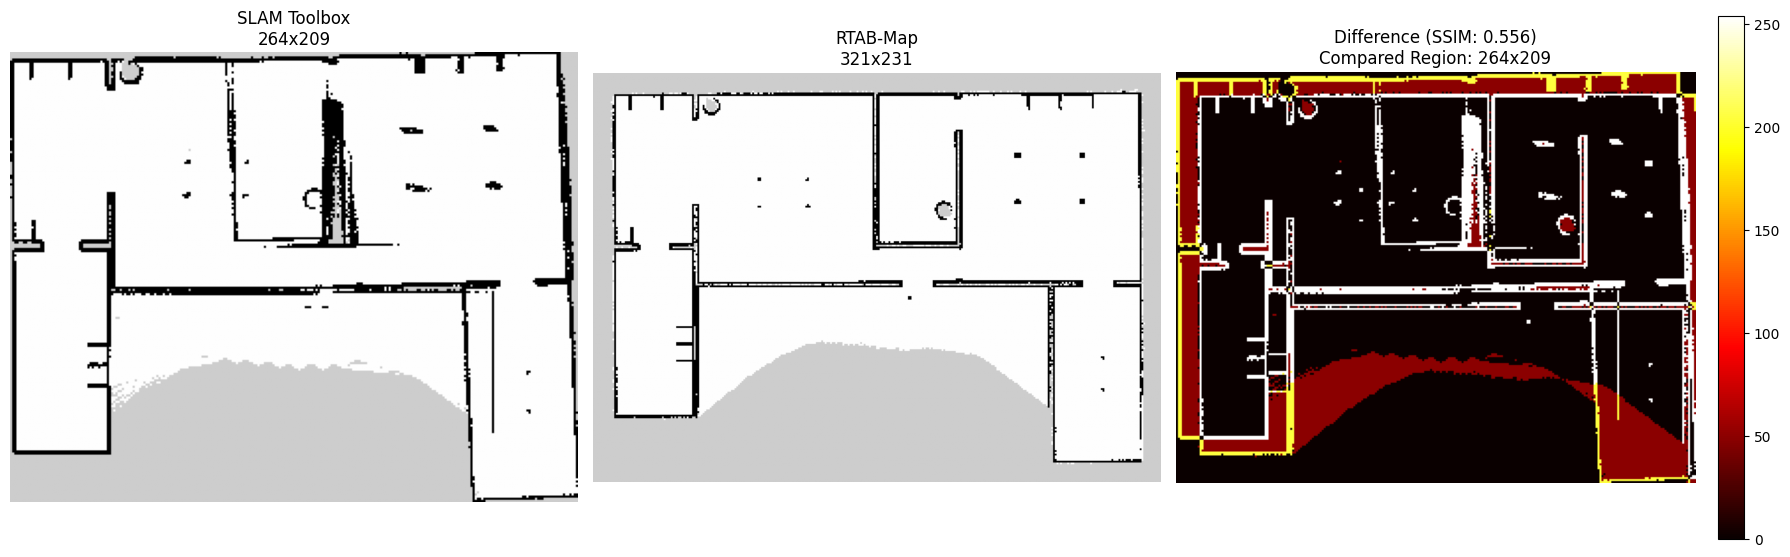

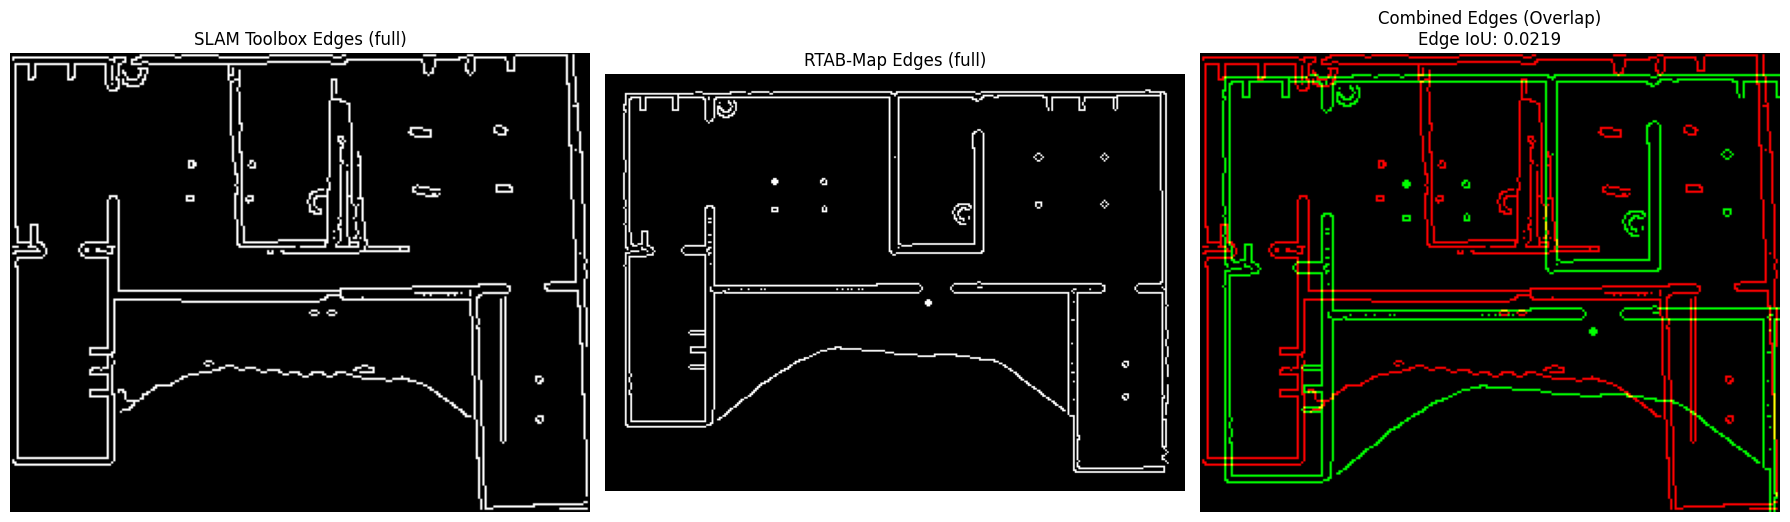


COMPARISON RESULTS:
SSIM (on overlapping region of size 264x209): 0.5559
Edge IoU (on overlapping region of size 264x209): 0.0219





================================================== SUMMARY OF ALL COMPARISONS ==================================================
Comparison: Cartographer vs SLAM Toolbox
  SSIM (on overlapping region): 0.5901
  Edge IoU (on overlapping region): 0.0436
------------------------------------------------------------------------------
Comparison: Cartographer vs RTAB-Map
  SSIM (on overlapping region): 0.6352
  Edge IoU (on overlapping region): 0.0500
------------------------------------------------------------------------------
Comparison: SLAM Toolbox vs RTAB-Map
  SSIM (on overlapping region): 0.5559
  Edge IoU (on overlapping region): 0.0219
------------------------------------------------------------------------------


In [ ]:
import yaml
import imageio.v2 as imageio
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.feature import canny
import os
from itertools import combinations

def load_map_data(yaml_path):
    with open(yaml_path) as f:
        data = yaml.safe_load(f)
    img = imageio.imread(os.path.join(os.path.dirname(yaml_path), data['image']))
    return img, float(data['resolution'])

def print_original_dimensions(map_data, name):
    print(f"{name}:")
    print(f"  Original size: {map_data[0].shape[1]}x{map_data[0].shape[0]} pixels")
    print(f"  Resolution: {map_data[1]:.3f} m/pixel\n")

def extract_edges(image, sigma=1.0):
    if np.mean(image) > 127:
        image = 255 - image
    return canny(image, sigma=sigma)

def edge_iou_score(edges1, edges2):
    intersection = np.logical_and(edges1, edges2).sum()
    union = np.logical_or(edges1, edges2).sum()
    return intersection / union if union > 0 else 0

def compare_maps(map1, map2, name1, name2, results):
    #####
    h_overlap, w_overlap = min(map1.shape[0], map2.shape[0]), min(map1.shape[1], map2.shape[1])
    map1_cropped = map1[:h_overlap, :w_overlap]
    map2_cropped = map2[:h_overlap, :w_overlap]

    #SSIM
    ssim_score = ssim(map1_cropped, map2_cropped, data_range=255 if map1_cropped.dtype == np.uint8 else 1.0)

    #calculating Edge IoU on the overlapping region
    edges1_full = extract_edges(map1)
    edges2_full = extract_edges(map2)
    edges1_overlap = edges1_full[:h_overlap, :w_overlap]
    edges2_overlap = edges2_full[:h_overlap, :w_overlap]
    #IoU
    edge_iou = edge_iou_score(edges1_overlap, edges2_overlap)

    #visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    #maps 1
    axes[0].imshow(map1, cmap='gray', vmin=0, vmax=255)
    axes[0].set_title(f'{name1}\n{map1.shape[1]}x{map1.shape[0]}')
    axes[0].axis('off')
    #map 2
    axes[1].imshow(map2, cmap='gray', vmin=0, vmax=255)
    axes[1].set_title(f'{name2}\n{map2.shape[1]}x{map2.shape[0]}')
    axes[1].axis('off')

    #difference image (on the cropped region for SSIM)
    diff = np.abs(map1_cropped.astype(float) - map2_cropped.astype(float))
    diff_full = np.zeros_like(map1, dtype=float)
    diff_full[:h_overlap, :w_overlap] = diff
    im = axes[2].imshow(diff_full, cmap='hot')
    plt.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)
    axes[2].set_title(f'Difference (SSIM: {ssim_score:.3f})\nCompared Region: {w_overlap}x{h_overlap}')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

    #edge comparison visualization (on the overlapping region)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    axes[0].imshow(edges1_full, cmap='gray')
    axes[0].set_title(f'{name1} Edges (full)')
    axes[0].axis('off')

    axes[1].imshow(edges2_full, cmap='gray')
    axes[1].set_title(f'{name2} Edges (full)')
    axes[1].axis('off')

    #combined edge view for IOU (on the overlapping region)
    edge_diff = np.zeros((h_overlap, w_overlap, 3), dtype=np.uint8)
    e1_overlap_int = edges1_overlap.astype(int)
    e2_overlap_int = edges2_overlap.astype(int)
    edge_diff[e1_overlap_int == 1, 0] = 255  #red for edges only in map1 in RGB (r=0, g=1)
    edge_diff[e2_overlap_int == 1, 1] = 255  #green for edges only in map2
    edge_diff[np.logical_and(e1_overlap_int == 1, e2_overlap_int == 1), :2] = 255  #yellow for common edges

    axes[2].imshow(edge_diff)
    axes[2].set_title(f'Combined Edges (Overlap)\nEdge IoU: {edge_iou:.4f}')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

    print("\nCOMPARISON RESULTS:")
    print(f"SSIM (on overlapping region of size {w_overlap}x{h_overlap}): {ssim_score:.4f}")
    print(f"Edge IoU (on overlapping region of size {w_overlap}x{h_overlap}): {edge_iou:.4f}")
    print("="*50)
    print("\n\n")

    results[(name1, name2)] = {'ssim': ssim_score, 'iou': edge_iou}

def main():
    map_files = {
        'Cartographer': '/content/carto_map.yaml',
        'SLAM Toolbox': '/content/slamtool_map.yaml',
        'RTAB-Map': '/content/rtabmap_map.yaml'
    }

    map_data = {}
    for name, path in map_files.items():
        try:
            map_data[name] = load_map_data(path)
        except Exception as e:
            print(f"Error loading {name}: {e}")

    comparison_results = {}
    for (name1, data1), (name2, data2) in combinations(map_data.items(), 2):
        print(f"-------------------------------------COMPARING: {name1} vs {name2}-------------------------------------------")
        print_original_dimensions(data1, name1)
        print_original_dimensions(data2, name2)
        compare_maps(data1[0], data2[0], name1, name2, comparison_results)

    print("\n\n"+"="*50+" SUMMARY OF ALL COMPARISONS "+"="*50)
    for (n1, n2), scores in comparison_results.items():
        print(f"Comparison: {n1} vs {n2}")
        print(f"  SSIM (on overlapping region): {scores['ssim']:.4f}")
        print(f"  Edge IoU (on overlapping region): {scores['iou']:.4f}")
        print("-"*(52 + len("SUMMARY OF ALL COMPARISONS")))

if __name__ == "__main__":
    main()

# **CPU and Memory Usage (0.15m/s)**

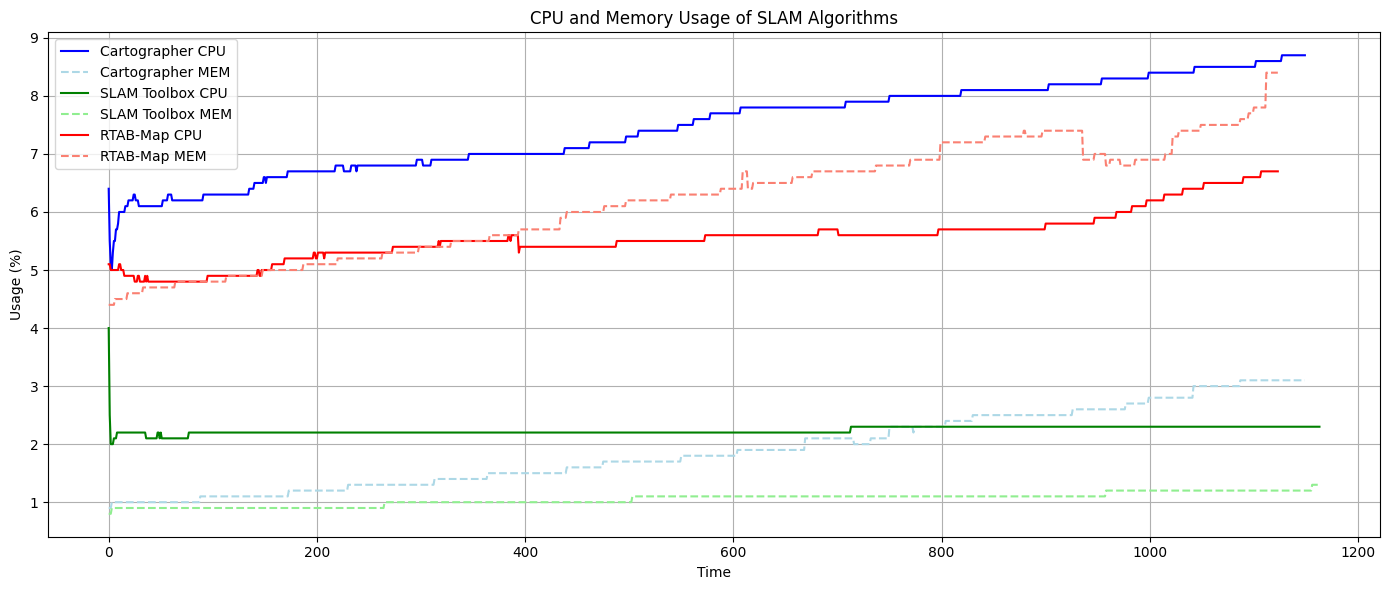

Average CPU and Memory Usage(%) 

   Algorithm  CPU(%)  MEM(%)
Cartographer    7.46    1.90
SLAM Toolbox    2.24    1.05
    RTAB-Map    5.56    6.19


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_process(csv_path):
    df = pd.read_csv(csv_path, sep=r'\s+', header=None, names=["Time", "CPU", "MEM"])
    df["CPU"] = pd.to_numeric(df["CPU"], errors='coerce')
    df["MEM"] = pd.to_numeric(df["MEM"], errors='coerce')
    df.dropna(inplace=True)
    return df

carto_df = load_and_process("/content/carto_resources.csv")
slamtool_df = load_and_process("/content/slamtool_resources.csv")
rtabmap_df = load_and_process("/content/rtabmap_resources.csv")

avg_data = {
    "Algorithm": ["Cartographer", "SLAM Toolbox", "RTAB-Map"],
    "CPU(%)": [
        round(carto_df["CPU"].mean(), 2),
        round(slamtool_df["CPU"].mean(), 2),
        round(rtabmap_df["CPU"].mean(), 2)
    ],
    "MEM(%)": [
        round(carto_df["MEM"].mean(), 2),
        round(slamtool_df["MEM"].mean(), 2),
        round(rtabmap_df["MEM"].mean(), 2)
    ]
}

avg_df = pd.DataFrame(avg_data)

plt.figure(figsize=(14, 6))
plt.plot(carto_df["CPU"].values, label="Cartographer CPU", color="blue")
plt.plot(carto_df["MEM"].values, label="Cartographer MEM", color="lightblue", linestyle="--")

plt.plot(slamtool_df["CPU"].values, label="SLAM Toolbox CPU", color="green")
plt.plot(slamtool_df["MEM"].values, label="SLAM Toolbox MEM", color="lightgreen", linestyle="--")

plt.plot(rtabmap_df["CPU"].values, label="RTAB-Map CPU", color="red")
plt.plot(rtabmap_df["MEM"].values, label="RTAB-Map MEM", color="salmon", linestyle="--")

plt.legend()
plt.title("CPU and Memory Usage of SLAM Algorithms")
plt.xlabel("Time")
plt.ylabel("Usage (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Average CPU and Memory Usage(%) ")
print('')
print(avg_df.to_string(index=False))


# ***===============================================================================================================***

# **MAPS (0.24m/s)**

Map 1 Image Path: /content/carto_map2.pgm
Map 2 Image Path: /content/slamtool2_map.pgm
Map 3 Image Path: /content/rtabmap2_map.pgm


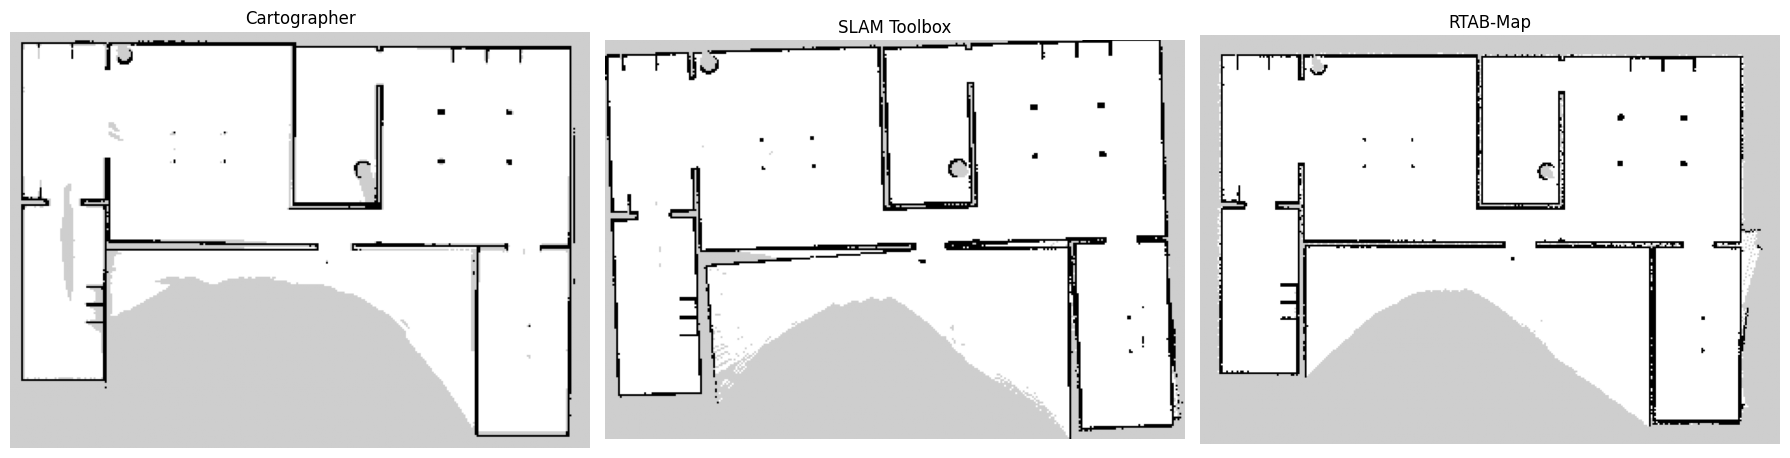

In [ ]:
import os
import yaml
import matplotlib.pyplot as plt
import imageio.v2 as imageio


def load_image_from_yaml(yaml_file_path):
    with open(yaml_file_path, 'r') as file:
        data = yaml.safe_load(file)
        image_filename = data.get('image')
        if image_filename:
            image_path = os.path.join(os.path.dirname(yaml_file_path), image_filename)
            return image_path
        else:
            raise ValueError(f"No image path found in {yaml_file_path}")

def display_all_maps(paths, titles):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for i, (path, title) in enumerate(zip(paths, titles)):
        img = imageio.imread(path)
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(title)
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()


map1_yaml = '/content/carto_map2.yaml'
map2_yaml = '/content/slamtool2_map.yaml'
map3_yaml = '/content/rtabmap2_map.yaml'


map1_image_path = load_image_from_yaml(map1_yaml)
map2_image_path = load_image_from_yaml(map2_yaml)
map3_image_path = load_image_from_yaml(map3_yaml)

print("Map 1 Image Path:", map1_image_path)
print("Map 2 Image Path:", map2_image_path)
print("Map 3 Image Path:", map3_image_path)


display_all_maps(
    [map1_image_path, map2_image_path, map3_image_path],
    ["Cartographer", "SLAM Toolbox", "RTAB-Map"]
)


# **SSIM, IoU and Heatmap (0.25m/s)**

-------------------------------------COMPARING: Cartographer vs SLAM Toolbox-------------------------------------------
Cartographer:
  Original size: 312x224 pixels
  Resolution: 0.050 m/pixel

SLAM Toolbox:
  Original size: 311x214 pixels
  Resolution: 0.050 m/pixel


INITIAL COMPARISON:


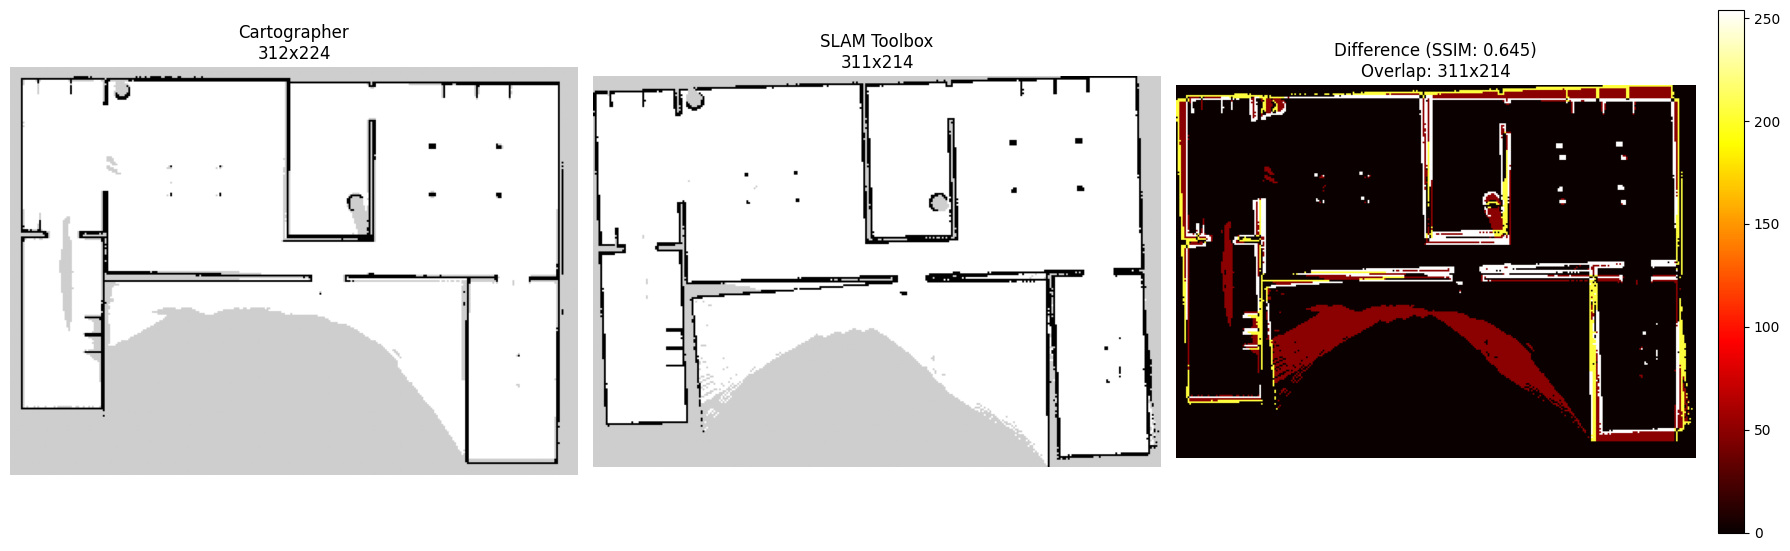


AFTER SHIFTING APPLIED:
Applied shift: (2, 4) pixels


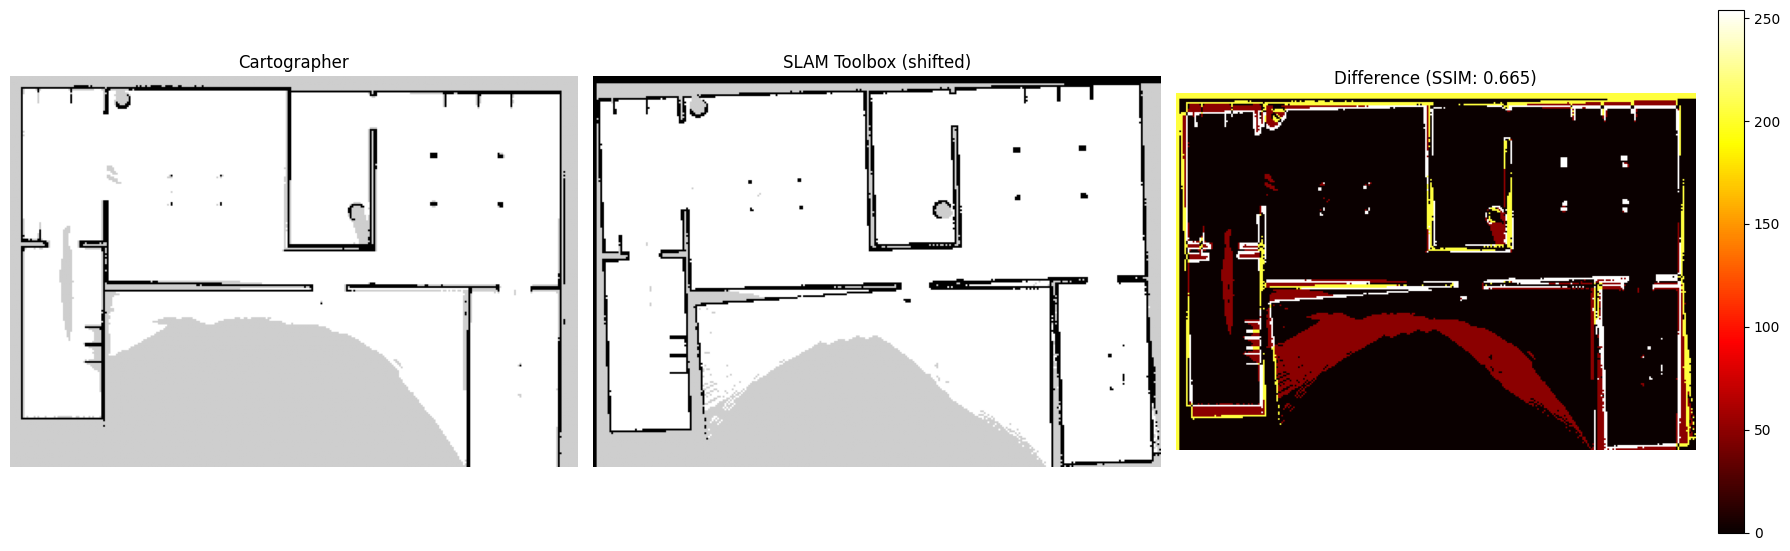

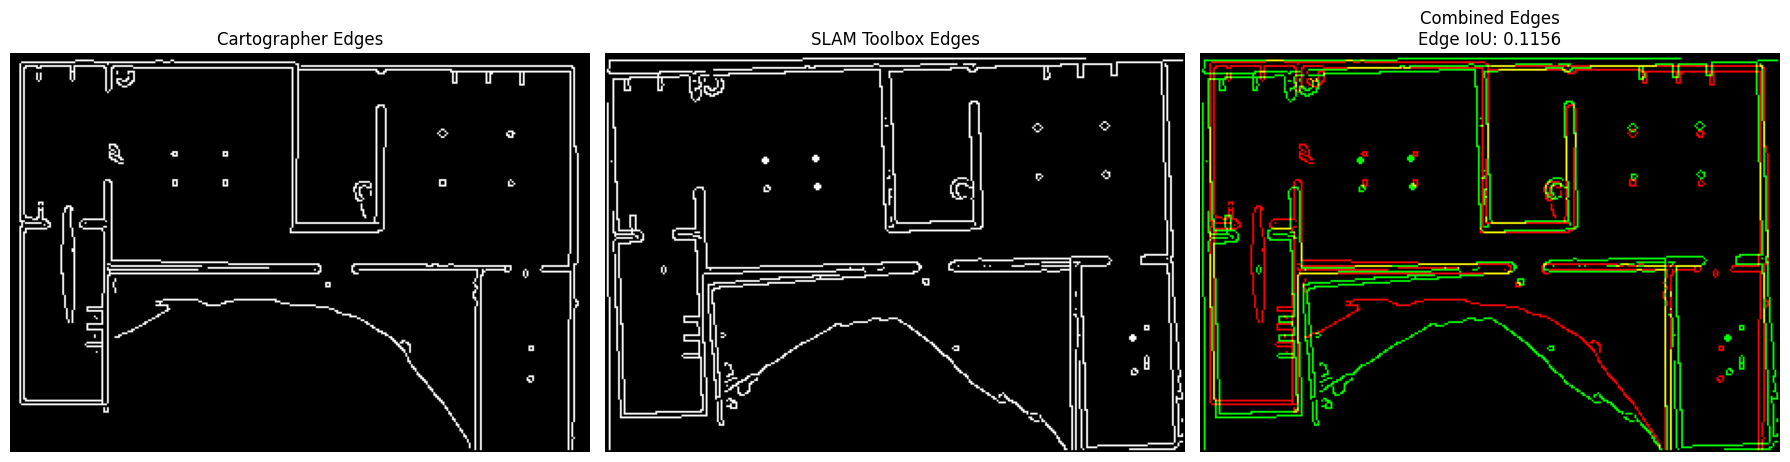


SUMMARY:
Before registration - SSIM: 0.6446, Edge IoU: 0.1056
After registration  - SSIM: 0.6651, Edge IoU: 0.1156



-------------------------------------COMPARING: Cartographer vs RTAB-Map-------------------------------------------
Cartographer:
  Original size: 312x224 pixels
  Resolution: 0.050 m/pixel

RTAB-Map:
  Original size: 332x234 pixels
  Resolution: 0.050 m/pixel


INITIAL COMPARISON:


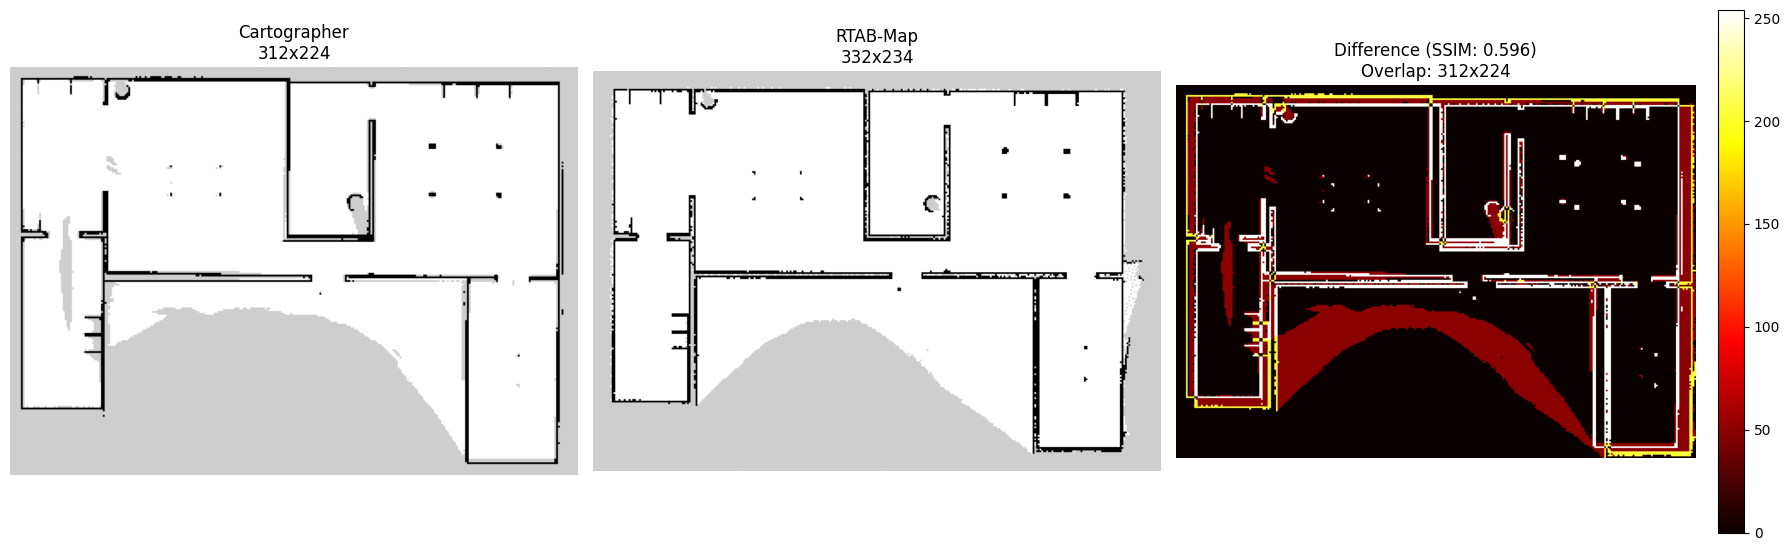


AFTER SHIFTING APPLIED:
Applied shift: (-8, -4) pixels


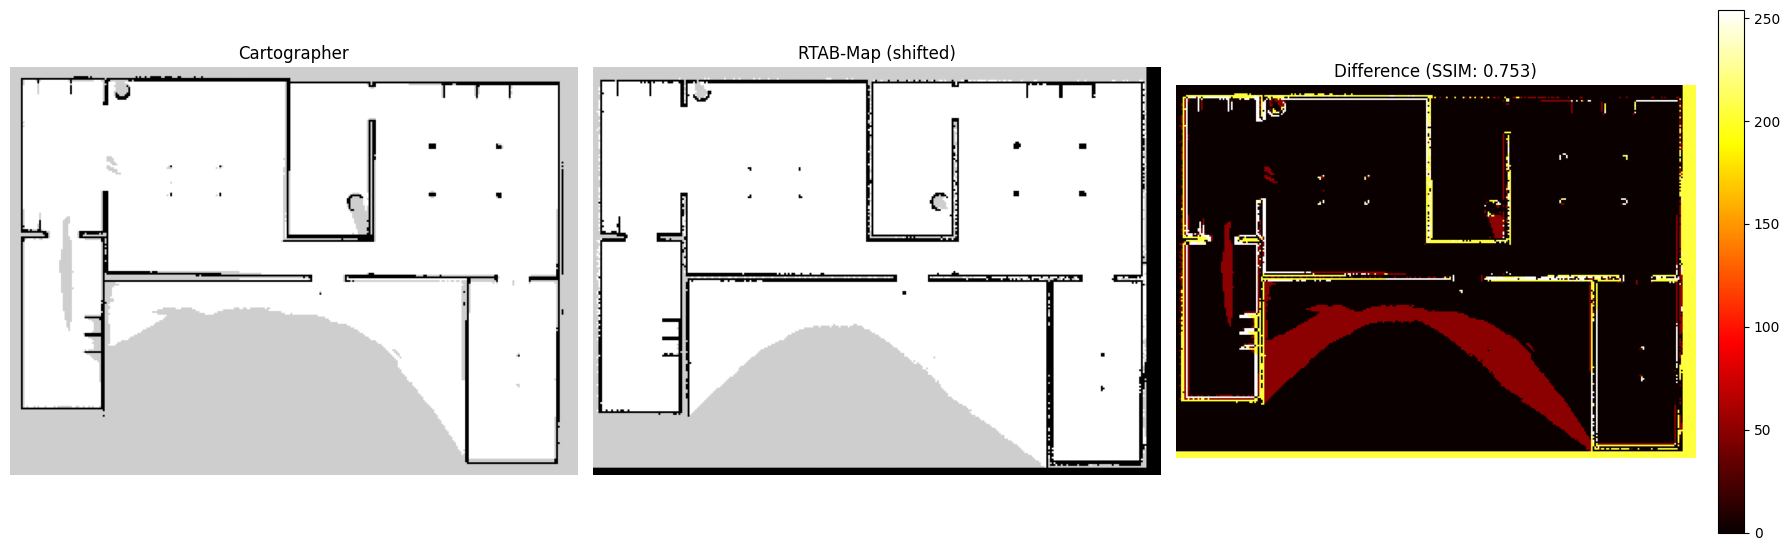

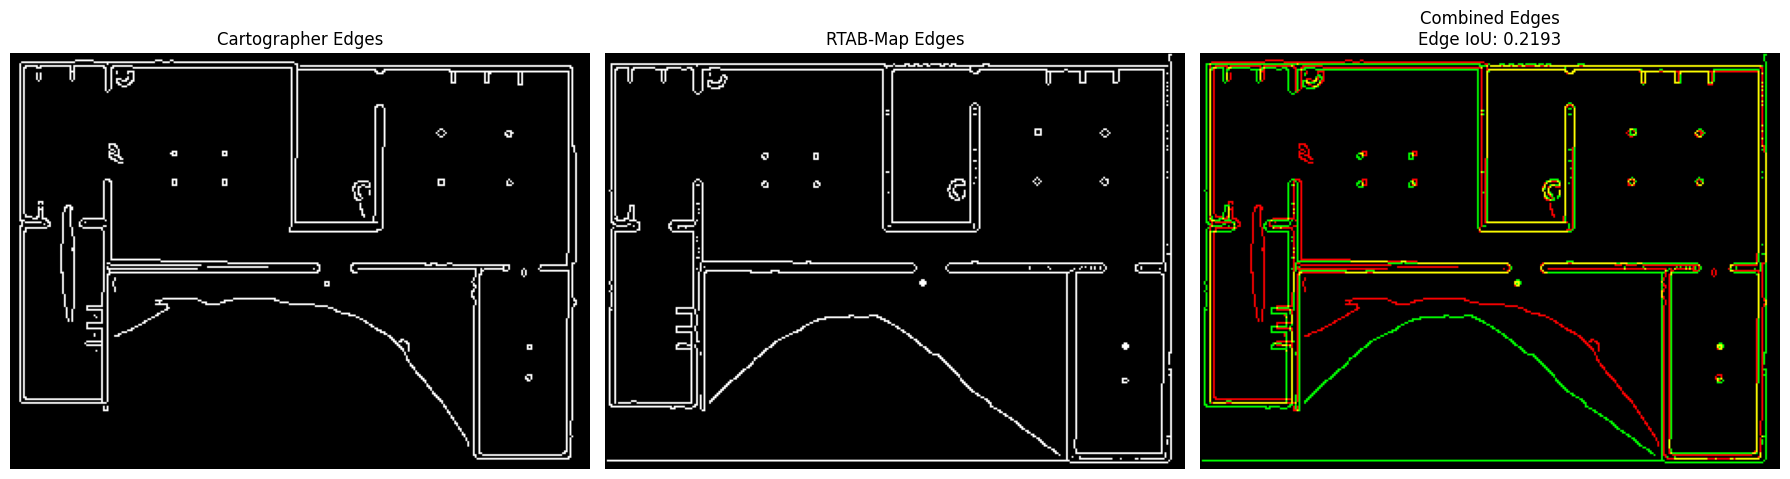


SUMMARY:
Before registration - SSIM: 0.5957, Edge IoU: 0.0273
After registration  - SSIM: 0.7528, Edge IoU: 0.2193



-------------------------------------COMPARING: SLAM Toolbox vs RTAB-Map-------------------------------------------
SLAM Toolbox:
  Original size: 311x214 pixels
  Resolution: 0.050 m/pixel

RTAB-Map:
  Original size: 332x234 pixels
  Resolution: 0.050 m/pixel


INITIAL COMPARISON:


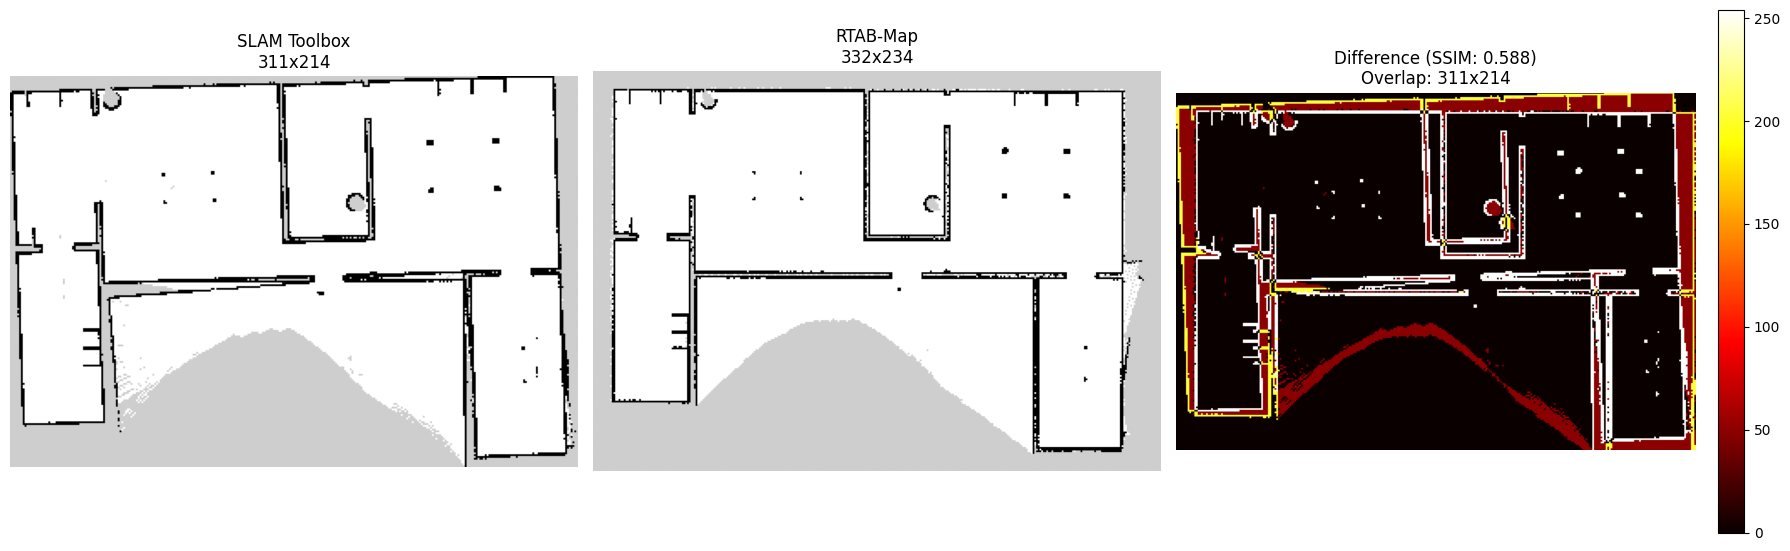


AFTER SHIFTING APPLIED:
Applied shift: (-10, -8) pixels


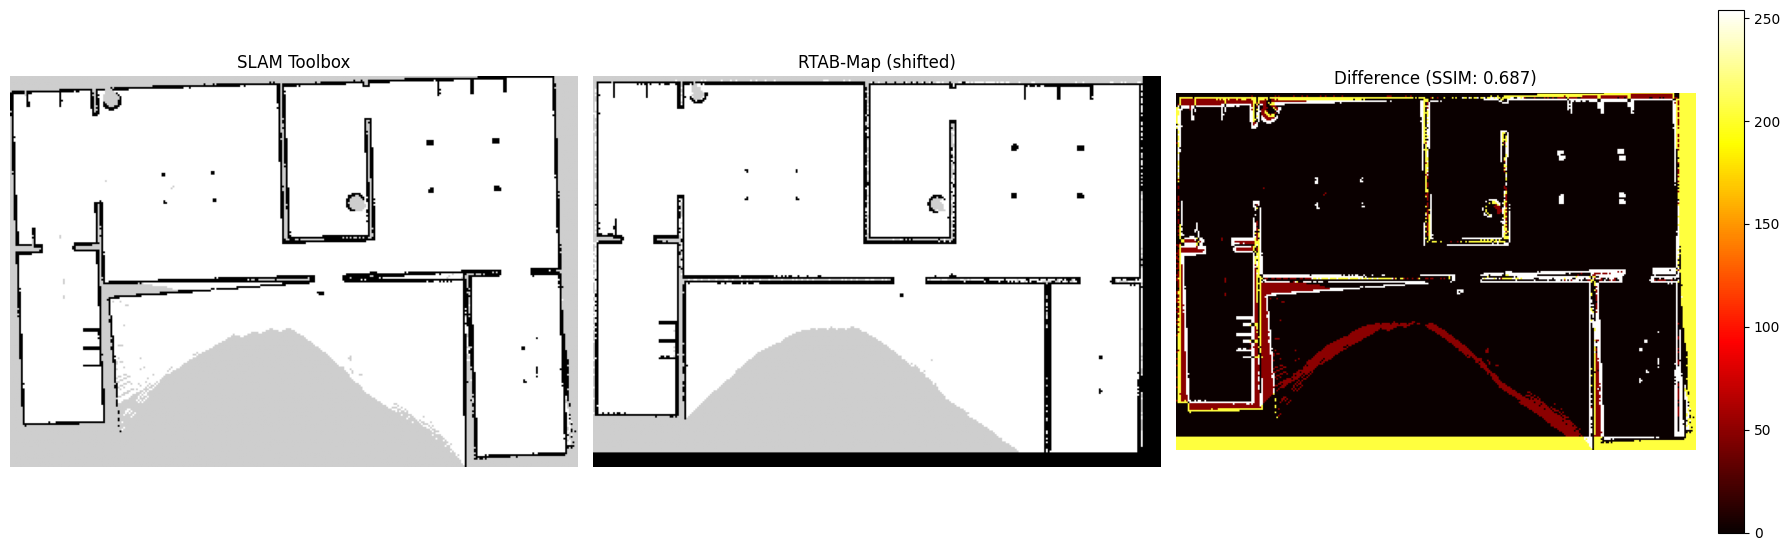

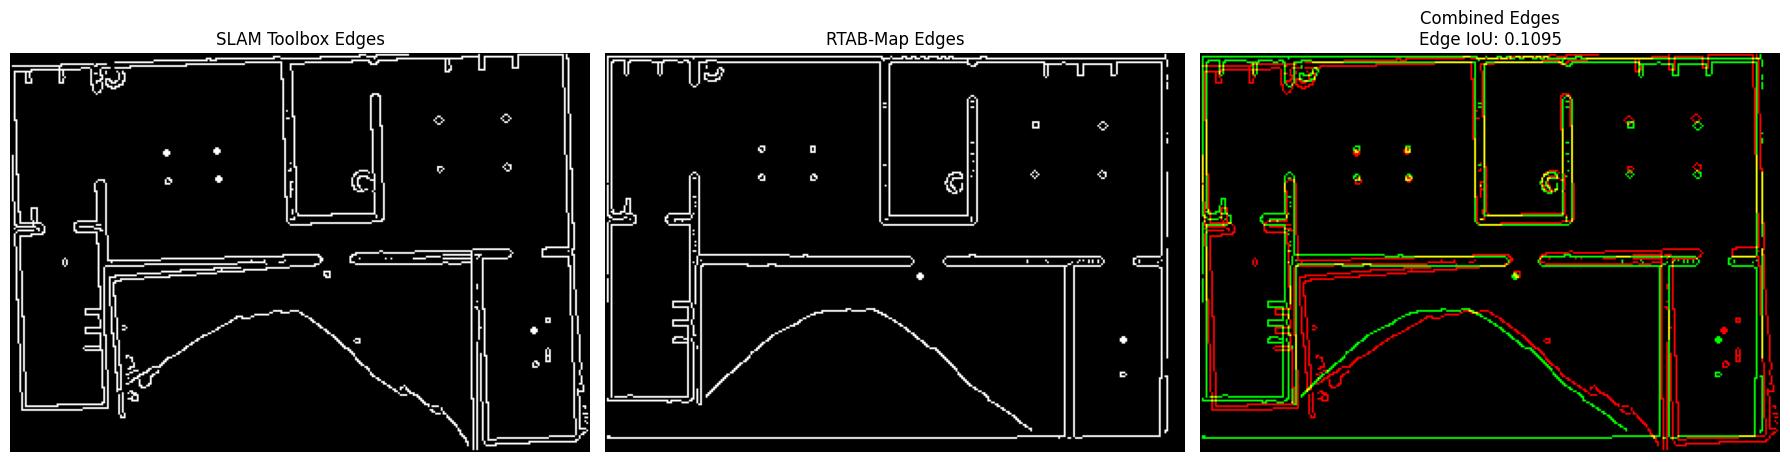


SUMMARY:
Before registration - SSIM: 0.5882, Edge IoU: 0.0341
After registration  - SSIM: 0.6867, Edge IoU: 0.1095





In [ ]:
import yaml
import imageio.v2 as imageio
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.feature import canny
import os
from itertools import combinations

def load_map_data(yaml_path):
    with open(yaml_path) as f:
        data = yaml.safe_load(f)
    img = imageio.imread(os.path.join(os.path.dirname(yaml_path), data['image']))
    return img, float(data['resolution'])

def print_original_dimensions(map_data, name):
    print(f"{name}:")
    print(f"  Original size: {map_data[0].shape[1]}x{map_data[0].shape[0]} pixels")
    print(f"  Resolution: {map_data[1]:.3f} m/pixel\n")

def extract_edges(image, sigma=1.0):
    if np.mean(image) > 127:
        image = 255 - image
    return canny(image, sigma=sigma)

def edge_iou_score(edges1, edges2):
    intersection = np.logical_and(edges1, edges2).sum()
    union = np.logical_or(edges1, edges2).sum()
    return intersection / union if union > 0 else 0

def initial_comparison(map1, map2, name1, name2):
    h, w = min(map1.shape[0], map2.shape[0]), min(map1.shape[1], map2.shape[1])
    map1_crop = map1[:h, :w]
    map2_crop = map2[:h, :w]

    #Metrics
    ssim_score = ssim(map1_crop, map2_crop)
    edges1 = extract_edges(map1_crop)
    edges2 = extract_edges(map2_crop)
    edge_iou = edge_iou_score(edges1, edges2)

    #Visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    #Original maps
    axes[0].imshow(map1, cmap='gray')
    axes[0].set_title(f'{name1}\n{map1.shape[1]}x{map1.shape[0]}')
    axes[0].axis('off')

    axes[1].imshow(map2, cmap='gray')
    axes[1].set_title(f'{name2}\n{map2.shape[1]}x{map2.shape[0]}')
    axes[1].axis('off')

    #Heatmap
    diff = np.zeros_like(map1, dtype=float)
    diff[:h, :w] = np.abs(map1_crop.astype(float) - map2_crop.astype(float))
    im = axes[2].imshow(diff, cmap='hot')
    plt.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)
    axes[2].set_title(f'Difference (SSIM: {ssim_score:.3f})\nOverlap: {w}x{h}')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

    return ssim_score, edge_iou

def register_and_compare(map1_data, map2_data, name1, name2, max_shift=20):
    map1, map2 = map1_data[0], map2_data[0]

    print("\nINITIAL COMPARISON:")
    ssim_before, edge_iou_before = initial_comparison(map1, map2, name1, name2)

    #SHIFTING
    h, w = min(map1.shape[0], map2.shape[0]), min(map1.shape[1], map2.shape[1])
    map1_crop = map1[:h, :w]
    map2_crop = map2[:h, :w]

    best_ssim = -1 #(-1,1) range for ssim
    best_shift = (0, 0)

    #finding best alignment for shifting  ; computes 21x21 times=441
    for y_shift in range(-max_shift, max_shift+1, 2):
        for x_shift in range(-max_shift, max_shift+1, 2):
            if x_shift >=0 and y_shift >=0:
                m1 = map1_crop[y_shift:, x_shift:]
                m2 = map2_crop[:h-y_shift, :w-x_shift]
            elif x_shift >=0 and y_shift <0:
                m1 = map1_crop[:h+y_shift, x_shift:]
                m2 = map2_crop[-y_shift:, :w-x_shift]
            elif x_shift <0 and y_shift >=0:
                m1 = map1_crop[y_shift:, :w+x_shift]
                m2 = map2_crop[:h-y_shift, -x_shift:]
            else:
                m1 = map1_crop[:h+y_shift, :w+x_shift]
                m2 = map2_crop[-y_shift:, -x_shift:]

            if m1.size == 0 or m2.size == 0:
                continue

            current_ssim = ssim(m1, m2)
            if current_ssim > best_ssim:
                best_ssim = current_ssim
                best_shift = (x_shift, y_shift)

    #applying best shift
    x_shift, y_shift = best_shift
    shifted_map2 = np.zeros_like(map2_crop) #has a black bg

    if x_shift >=0 and y_shift >=0:
        shifted_map2[y_shift:, x_shift:] = map2_crop[:h-y_shift, :w-x_shift]
    elif x_shift >=0 and y_shift <0:
        shifted_map2[:h+y_shift, x_shift:] = map2_crop[-y_shift:, :w-x_shift]
    elif x_shift <0 and y_shift >=0:
        shifted_map2[y_shift:, :w+x_shift] = map2_crop[:h-y_shift, -x_shift:]
    else:
        shifted_map2[:h+y_shift, :w+x_shift] = map2_crop[-y_shift:, -x_shift:]

    print("\nAFTER SHIFTING APPLIED:")
    print(f"Applied shift: {best_shift} pixels")

    #metrics after
    ssim_after = ssim(map1_crop, shifted_map2)
    edges1 = extract_edges(map1_crop)
    edges2 = extract_edges(shifted_map2)
    edge_iou_after = edge_iou_score(edges1, edges2)

    #visualization after
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    #original and shifted maps
    axes[0].imshow(map1_crop, cmap='gray')
    axes[0].set_title(f'{name1}')
    axes[0].axis('off')

    axes[1].imshow(shifted_map2, cmap='gray')
    axes[1].set_title(f'{name2} (shifted)')
    axes[1].axis('off')

    diff = np.abs(map1_crop.astype(float) - shifted_map2.astype(float))
    im = axes[2].imshow(diff, cmap='hot')
    plt.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)
    axes[2].set_title(f'Difference (SSIM: {ssim_after:.3f})')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

    #edge comparison visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    axes[0].imshow(edges1, cmap='gray')
    axes[0].set_title(f'{name1} Edges')
    axes[0].axis('off')

    axes[1].imshow(edges2, cmap='gray')
    axes[1].set_title(f'{name2} Edges')
    axes[1].axis('off')

    #combined edge view for IOU
    edge_diff = np.zeros((h, w, 3), dtype=np.uint8)
    edge_diff[edges1, 0] = 255  # Red for edges only in map1
    edge_diff[edges2, 1] = 255  # Green for edges only in map2
    edge_diff[np.logical_and(edges1, edges2), :2] = 255  # Yellow for common edges

    axes[2].imshow(edge_diff)
    axes[2].set_title(f'Combined Edges\nEdge IoU: {edge_iou_after:.4f}')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

    print("\nSUMMARY:")
    print(f"Before registration - SSIM: {ssim_before:.4f}, Edge IoU: {edge_iou_before:.4f}")
    print(f"After registration  - SSIM: {ssim_after:.4f}, Edge IoU: {edge_iou_after:.4f}")
    print("="*150)
    print("\n\n")

def main():
    map_files = {
        'Cartographer': '/content/carto_map2.yaml',
        'SLAM Toolbox': '/content/slamtool2_map.yaml',
        'RTAB-Map': '/content/rtabmap2_map.yaml'
    }

    map_data = {}
    for name, path in map_files.items():
        try:
            map_data[name] = load_map_data(path)
        except Exception as e:
            print(f"Error loading {name}: {e}")

    if len(map_data) < 2:
        print("Not enough valid maps to compare.")
        return

    for (name1, data1), (name2, data2) in combinations(map_data.items(), 2):
        print(f"-------------------------------------COMPARING: {name1} vs {name2}-------------------------------------------")
        print_original_dimensions(data1, name1)
        print_original_dimensions(data2, name2)
        register_and_compare(data1, data2, name1, name2)

if __name__ == "__main__":
    main()

# **CPU and Memory Usage (0.25m/s)**

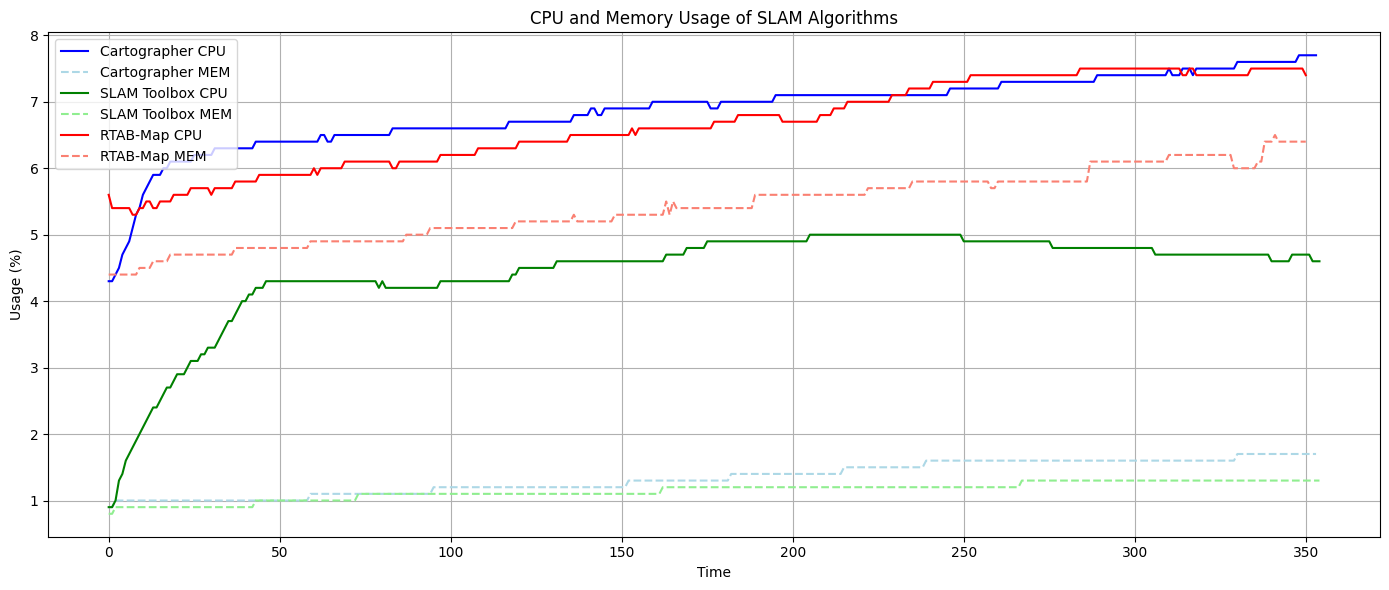

Average CPU and Memory Usage(%) 

   Algorithm  CPU(%)  MEM(%)
Cartographer    6.87    1.34
SLAM Toolbox    4.43    1.15
    RTAB-Map    6.66    5.42


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_process(csv_path):
    df = pd.read_csv(csv_path, sep=r'\s+', header=None, names=["Time", "CPU", "MEM"])
    df["CPU"] = pd.to_numeric(df["CPU"], errors='coerce')
    df["MEM"] = pd.to_numeric(df["MEM"], errors='coerce')
    df.dropna(inplace=True)
    return df

carto_df = load_and_process("/content/carto_resources.csv")
slamtool_df = load_and_process("/content/slamtool_resources.csv")
rtabmap_df = load_and_process("/content/rtabmap_resources.csv")


avg_data = {
    "Algorithm": ["Cartographer", "SLAM Toolbox", "RTAB-Map"],
    "CPU(%)": [
        round(carto_df["CPU"].mean(), 2),
        round(slamtool_df["CPU"].mean(), 2),
        round(rtabmap_df["CPU"].mean(), 2)
    ],
    "MEM(%)": [
        round(carto_df["MEM"].mean(), 2),
        round(slamtool_df["MEM"].mean(), 2),
        round(rtabmap_df["MEM"].mean(), 2)
    ]
}

avg_df = pd.DataFrame(avg_data)


plt.figure(figsize=(14, 6))
plt.plot(carto_df["CPU"].values, label="Cartographer CPU", color="blue")
plt.plot(carto_df["MEM"].values, label="Cartographer MEM", color="lightblue", linestyle="--")

plt.plot(slamtool_df["CPU"].values, label="SLAM Toolbox CPU", color="green")
plt.plot(slamtool_df["MEM"].values, label="SLAM Toolbox MEM", color="lightgreen", linestyle="--")

plt.plot(rtabmap_df["CPU"].values, label="RTAB-Map CPU", color="red")
plt.plot(rtabmap_df["MEM"].values, label="RTAB-Map MEM", color="salmon", linestyle="--")

plt.legend()
plt.title("CPU and Memory Usage of SLAM Algorithms")
plt.xlabel("Time")
plt.ylabel("Usage (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Average CPU and Memory Usage(%) ")
print('')
print(avg_df.to_string(index=False))
